<a href="https://colab.research.google.com/github/javiromeroo/Algoritmos-y-Estructuras-de-Datos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CC3001 Otoño 2023 Tarea 2 Javiera Romero Orrego 21166885-7

# Calculadora

### Profesores
Sección 1 Iván Sipirán •
Sección 2 Patricio Poblete •
Sección 3 Nelson Baloian

fue comentado como hacer la tarea con alejandro mori , ignacio humire y laura maldonado


# Enunciado

Esta tarea consiste en desarrollar una calculadora de expresiones matemáticas al estilo Matlab o Maple, pero con capacidad de procesar un conjunto de comandos bien restringido. Algunos ejemplos de los comandos que acepta y de lo que debe imprimir en la salida van a continuación:

|Entrada (lo que el usuario escribe)   | Salida(lo que imprime el programa)  |
|---|---|
|n=5   | 5  |
|hanoi=2^n-1    |31   |
|var_1 = 23 - 13 + hanoi * 2    |82   |
|h2 = hanoi /2   |15   |
|n   |5   |

A continuación definimos más en detalle lo que se debe implementar:



1.   Cada comando es de la forma "variable=expresión". El efecto es que se debe calcular la expresión de la derecha, guardar el resultado en la variable de la izquierda e imprimir el resultado en la salida. Si se omite desde el "=" hacia adelante (como en el último ejemplo), solo se imprime el valor de la variable. Las variables comienzan con letra y continúan con letras, dígitos y el signo "_".
2.   Los operadores permitidos son "+","-","*", "/", "^".
3.   Solo se trabaja con números enteros y todas las operaciones dan resultado entero (incluyendo la división, que trunca).
4.   Para simplificar, no se puede usar paréntesis y la expresión se evalúa estrictamente de izquierda a derecha. Eso explica el resultado que se obtiene para "var_1".
5.   Si se utiliza una variable que aún no ha sido definida, se debe dar un error

      ERROR: variable indefinida "..."

6.   Si la sintaxis no es correcta, se debe imprimir en la salida un mensaje de la forma

      ERROR: al procesar "..."

      donde el string que se imprime es la parte de la entrada desde el punto del error hacia adelante.


Antes de empezar a escribir código, usted debe dibujar un diagrama de estados que describa la estructura de la entrada. Si le resulta más conveniente, pueden ser varios diagramas (por ejemplo, uno que describa la estructura de una variable, otro la de un número, otra la de un comando). Luego, a partir de ahí escriba el código que implementa esos diagramas. **Importante:** Su código debe ir procesando de un caracter a la vez, para este procesamiento no se puede utilizar funciones de Python que operen sobre strings de largo mayor que uno. Se recomienda tener una función que reciba un comando en un string y lo procese, y otra que se encargue de ir leyendo líneas una a una e invocando a la función antes mencionada para procesarlas.

Para almacenar los nombres y valores de las variables, está permitido el uso de un diccionario de Python.

En su entrega debe describir brevemente el problema, luego describir la estrategia de solución a través de los diagramas de estados, y a continuación el código ejecutable respectivo, agregando todas las explicaciones necesarias para que se entienda.



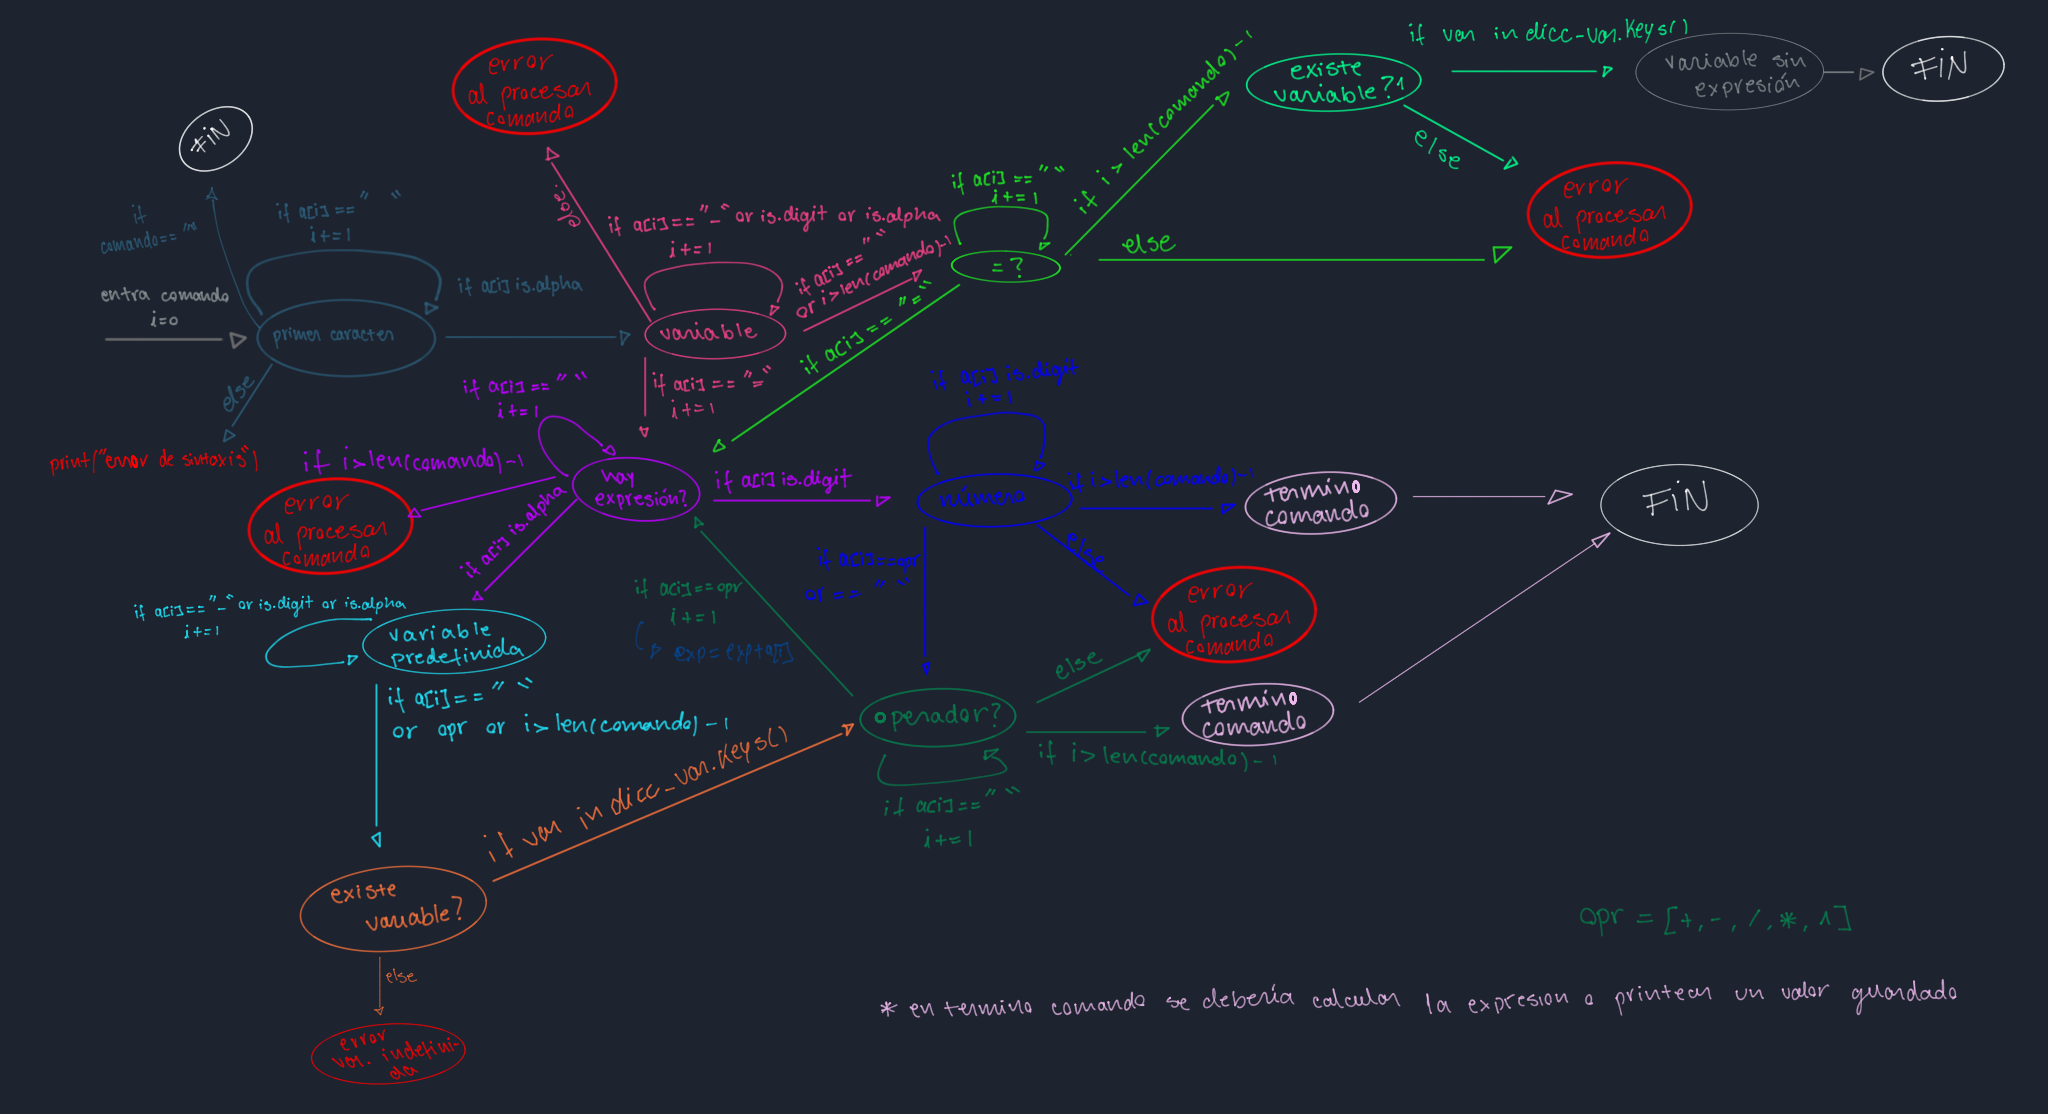

In [ ]:
# Esta función recibe un comando en string y el diccionario de variables. Con él,
# procesa el comando, imprime el resultado de la expresion
# y posiblemente modifica el diccionario. La función retorna el diccionario
import math
def procesar_comando(comando, dicc_var):
  i=0
  var=""
  exp=""
  exp_lista=[]
  var_predef=""
  estado = "primer caracter"
  opr=["+","-","/","^","*"]
  n=0
  while estado != "fin":

    if estado == "primer caracter":
      if comando == "":#lista vacia quebramos el loop para que no devuelva nada
        estado="fin"
      elif comando[i]== " ": #si es un espacio seguimos buscando por eso sumamos 1
        i+=1
      elif comando[i].isalpha(): #si es letra entonces la guardamos ya q el primer caracter
      #solo puede ser letra agregamos uno a i y pasamos a variable ahí guardaremos lo demas
        var=var+comando[i]
        i+=1
        estado="variable"
      else:
        print("error de sintaxis")#si no es error  y quebramos
        break

    elif estado == "variable":  #ya guardamos el primer valor de la variable
      if i > len(comando)-1: #si es espacio o recorrimos todo vamos a ver si hay un igual o no empzando desde el mismo i
        estado = "=?"
      elif comando[i]==" ":
        estado = "=?"
      elif comando[i] == "_" or comando[i].isdigit() or comando[i].isalpha(): #si i es algo permitido en var lo guardamos y sumamos uno al i
        var = var + comando[i]
        i+=1
        #no cambiamos de estado
      elif comando[i]=="=": #si es un igual entonces sumamos 1 pq ya esta el igual y vamos a buscar si hay exp dsp del igual
        i+=1
        estado="hay expresion?"
      else:
        print("ERROR: al procesar "+comando[i:len(comando)])
        break

    elif estado=="=?":
      if i>len(comando)-1:
        estado="existe variable?1" #ya terminamos y no habia igual así q pasamos a ver la variable escrita existe o no
      elif comando[i]==" ": #seguimos buscando
        i+=1
      elif comando[i]=="=":#enocntramos el igual vemos q hay dsp del igual por eso sumamos 1
        i+=1
        estado="hay expresion?"
      else:
        print("ERROR: al procesar "+comando[i:len(comando)])
        break

    elif estado == "existe variable?1": #este es para cuando la variable viene solita no hay igual
      if var in dicc_var.keys():
        estado = "var sin expresion" #vamos a un estado donde nos tire la expresion guardada ya q no hay nada a la derecha que calcular
      else:
        print("ERROR: variable indefinida "+ var)
        break
      #revisar si la variable esta en el diccionario

    elif estado == "hay expresion?":

      if comando[i] in opr:
        i+=1
      elif i>len(comando)-1: #no puede haber un opr sin nada dsp o un igual sin nada dsp
        print("ERROR: al procesar "+comando[i:len(comando)])
        break #puede q sea un else el ultimo con error nomas
      elif comando[i]==" ":#seguimos buscando si está la exp
        i+=1
      elif comando[i].isalpha():
        estado= "variable predefinida"  #vamos a buscar la var predef
      elif comando[i].isdigit():
        #vamos a guardar el numero
        estado = "numero"

    elif estado == "numero":

      if i>len(comando)-1: #ya esta listo y vamos a procesar
        exp_lista.append(int(exp))
        estado="termino comando"
      elif comando[i].isdigit():
        exp = exp +comando[i]#seguir construyendo el numero y guardandolo el la expresion
        i+=1
      elif comando[i] in opr or comando[i]==" ":
        exp_lista.append(int(exp))
        exp="" #vamos a buscar el operador si es espacio si era operador vamos a buscarlo tmb
        estado="operador?"
      else:
        print("ERROR: al procesar "+ comando[i:len(comando)]) #si no hubo un error
        break

    elif estado == "variable predefinida":
      if comando[i] == " "  or comando[i] in opr or i > len(comando)-1 :
        estado="existe variable?"
      elif comando[i] == "_" or comando[i].isdigit or comando[i].isalpha : #sabemos q deberia haber al menos uno aca pq no le sumamos cuando encontramos la letra
        var_predef= var_predef+comando[i]
        i+=1



    elif estado== "existe variable?":
      if var_predef in dicc_var.keys():
        var_predef = dicc_var[var_predef]
        exp_lista.append(var_predef)
        var_predef=""
        estado="operador?"
      else:
        print('ERROR: variable indefinida ' + '"' +var_predef+'"')
        comando=""
        estado= "fin"
        break



    elif estado == "operador?":

      if i>len(comando)-1:
        estado="termino comando"#si ya estamos en el final entonces procesamos
      elif comando[i]==" ":
        i+=1 #seguimos buscando si hay algo mas
      elif comando[i] in opr:

        exp_lista.append(comando[i])
        #si hay un operador lo guardamos en la exp y seguimos viendo
         #si hay un operador lo guardamos en la exp y seguimos viendo
        exp=""
        var_predef=""
        estado = "hay expresion?"
      else:
        print("ERROR: al procesar "+ comando[i:len(comando)] )
        break

    elif estado == "var sin expresion": #si es solo la exp buscamos el valor ya asignado a la var en el dicc y devolvemos esto

      exp_lista.append(dicc_var[var])
      estado="fin"

    elif estado == "termino comando":

      estado="fin"
      while n < len(exp_lista)-1: #aca empezamos a operar la lista segun que operador sea y terminamos solo cuando ya acabamos la lista

        if not exp_lista[n] in opr:
           n+=1
        elif exp_lista[n] in opr:
          if exp_lista[n] == "+":
            exp_lista[n+1]= exp_lista[n-1] + exp_lista[n+1]
            n+=1

          elif exp_lista[n] == "-":
            exp_lista[n+1]=exp_lista[n-1] - exp_lista[n+1]
            n+=1

          elif exp_lista[n] == "/":
            exp_lista[n+1]=exp_lista[n-1] / exp_lista[n+1]
            n+=1

          elif exp_lista[n] == "*":
            exp_lista[n+1]= exp_lista[n-1] * exp_lista[n+1]
            n+=1

          elif exp_lista[n] == "^":
            exp_lista[n+1]= exp_lista[n-1] ** exp_lista[n+1]
            n+=1

  if comando=="":
    True #para q no devuelva nada XD
  else:

   dicc_var[var]=math.floor(float(exp_lista[len(exp_lista)-1]))
   print(dicc_var[var])
  # procesa el comando e imprime el resultado
  return dicc_var

def calculadora(lista_comandos):
  # Este diccionario almacena las variables que se vayan definiendo en la calculadora
  # Este diccionario se inicializa cuando se usa la calculadora
  vars = dict()

  # Se procesan todos los comandos de la lista (lista de string)
  for i in range(0, len(lista_comandos)):
    vars = procesar_comando(lista_comandos[i], vars)


## Ejemplo 1

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi * 2","h2 = hanoi /2","","n"]
calculadora(lista)


5
31
82
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

   5

   31

   82

   15

   5



In [ ]:
a = "hola"

for i in range(0,len(a)):
  print(i)

0
1
2
3


## Ejemplo 2

In [ ]:
# EJEMPLO 1:
lista = ["n=5","hanoi=2^n-1","var_1 = 23 - 13 + hanoi2 * 2","h2 = hanoi /2","","n"]
calculadora(lista)

5
31
ERROR: variable indefinida "hanoi2"
15
5


El resultado del ejemplo anterior debería imprimir en pantalla

5

31

ERROR: variable indefinida "hanoi2"

15

5

## ¿Qué hay que entregar?

Usted debe crear una copia de este documento (del menú seleccionar "Archivo" o "File" y de ahi la opción "guardar copia en Drive" o "save a copy in Drive"). Este nuevo documento (notebook de Colab) es el que debe modificar para luego compartirlo con la opción "Cualquier usuario de internet con este enlace puede ver esto" (o “Anyone on the internet with this link can view”). Esta opción se encuentra disponible en la parte superior derecha de su notebook, en el botón "Compartir" (o "Share"). Una vez que tenga disponible el enlace, colocarlo en la descripción de la entrega de su tarea. No olvide colocar su nombre dentro del notebook.